# Carga de datos

In [1]:
import pymongo
import folium

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#carga de datos:
cliente = pymongo.MongoClient()

In [4]:
cliente.list_database_names()

['admin', 'companies_database', 'config', 'local', 'new_database']

In [5]:
db = cliente.companies_database
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database')

In [6]:
colec = db.companies
colec

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database'), 'companies')

Exploración del archivo

In [7]:
list(colec.find())[0].keys()

dict_keys(['_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url', 'blog_url', 'blog_feed_url', 'twitter_username', 'category_code', 'number_of_employees', 'founded_year', 'founded_month', 'founded_day', 'deadpooled_year', 'tag_list', 'alias_list', 'email_address', 'phone_number', 'description', 'created_at', 'updated_at', 'overview', 'image', 'products', 'relationships', 'competitions', 'providerships', 'total_money_raised', 'funding_rounds', 'investments', 'acquisition', 'acquisitions', 'offices', 'milestones', 'video_embeds', 'screenshots', 'external_links', 'partners'])

La información que me interesa traer es:
- name
- category_code
- number_of_employees
- founded_year
- description
- total_money_raised
- offices

Extracción de datos:

In [8]:
oficinas = colec.find({'offices':{'$not':{'$size':0}}},
                         {'name':True,'_id':0,'category_code':1,'founded_year':1,'description':1 ,'number_of_employees':1, 'offices':1, 'total_money_raised':1})

In [9]:
si_oficinas = list(oficinas)
si_oficinas[:10]

[{'name': 'Wetpaint',
  'category_code': 'web',
  'number_of_employees': 47,
  'founded_year': 2005,
  'description': 'Technology Platform Company',
  'total_money_raised': '$39.8M',
  'offices': [{'description': '',
    'address1': '710 - 2nd Avenue',
    'address2': 'Suite 1100',
    'zip_code': '98104',
    'city': 'Seattle',
    'state_code': 'WA',
    'country_code': 'USA',
    'latitude': 47.603122,
    'longitude': -122.333253},
   {'description': '',
    'address1': '270 Lafayette Street',
    'address2': 'Suite 505',
    'zip_code': '10012',
    'city': 'New York',
    'state_code': 'NY',
    'country_code': 'USA',
    'latitude': 40.7237306,
    'longitude': -73.9964312}]},
 {'name': 'AdventNet',
  'category_code': 'enterprise',
  'number_of_employees': 600,
  'founded_year': 1996,
  'description': 'Server Management Software',
  'total_money_raised': '$0',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd.',
    'address2': 'Suite 310',
    'zip_

In [10]:
df = pd.DataFrame(si_oficinas)
df

,name,category_code,number_of_employees,founded_year,description,total_money_raised,offices
0,Wetpaint,web,47.0,2005.0,Technology Platform Company,$39.8M,"[{'description': '', 'address1': '710 - 2nd Av..."
1,AdventNet,enterprise,600.0,1996.0,Server Management Software,$0,"[{'description': 'Headquarters', 'address1': '..."
2,Zoho,software,1600.0,2005.0,Online Business Apps Suite,$0,"[{'description': 'Headquarters', 'address1': '..."
3,Digg,news,60.0,2004.0,user driven social content website,$45M,"[{'description': None, 'address1': '135 Missis..."
4,Facebook,social,5299.0,2004.0,Social network,$2.43B,"[{'description': 'Headquarters', 'address1': '..."
...,...,...,...,...,...,...,...
13739,Oriact,software,NaN,2009.0,Solutions for software development,$0,"[{'description': '', 'address1': 'LÃ¤rchenweg ..."
13740,Adhunk,advertising,3.0,2009.0,Online Admanager,$0,"[{'description': 'Indian Office', 'address1': ..."
13741,AfterLogic,software,NaN,2002.0,.NET Email Components and Webmail,$0,"[{'description': 'Livingston', 'address1': 'P...."
13742,EnteGreat Solutions,software,NaN,NaN,,$0,"[{'description': '', 'address1': '', 'address2..."


Creación de listas a partir del df

In [11]:
list_address = [json_normalize(i) for i in df['offices']]

<ipython-input-11-8cb739a93598>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  list_address = [json_normalize(i) for i in df['offices']]


In [12]:
list_names = list(df['name'])

In [13]:
#verificamos longitud del json_normalize:

print(len(list_names),len(list_address))

13744 13744


In [14]:
#unimos las dos listas
zip_name_df = list(zip(list_names,list_address))

In [15]:
for i in zip_name_df:
    i[1]['name'] = i[0] #cambiarle a company (después)

In [16]:
concat_df = pd.DataFrame()
for i in range(len(zip_name_df)):
    concat_df = pd.concat([concat_df, zip_name_df[i][1]])

In [17]:
#Unes usando 'name' como llave 
# el df con las direcciones expandidas con el df original
df_expandido = pd.merge(df, concat_df, on = 'name')

In [18]:
df_expandido.head()

,name,category_code,number_of_employees,founded_year,description_x,total_money_raised,offices,description_y,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Wetpaint,web,47.0,2005.0,Technology Platform Company,$39.8M,"[{'description': '', 'address1': '710 - 2nd Av...",,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,Wetpaint,web,47.0,2005.0,Technology Platform Company,$39.8M,"[{'description': '', 'address1': '710 - 2nd Av...",,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
2,AdventNet,enterprise,600.0,1996.0,Server Management Software,$0,"[{'description': 'Headquarters', 'address1': '...",Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
3,Zoho,software,1600.0,2005.0,Online Business Apps Suite,$0,"[{'description': 'Headquarters', 'address1': '...",Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
4,Digg,news,60.0,2004.0,user driven social content website,$45M,"[{'description': None, 'address1': '135 Missis...",None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523


# Limpieza de datos

In [19]:
df = df_expandido
df.dtypes

name                    object
category_code           object
number_of_employees    float64
founded_year           float64
description_x           object
total_money_raised      object
offices                 object
description_y           object
address1                object
address2                object
zip_code                object
city                    object
state_code              object
country_code            object
latitude               float64
longitude              float64
dtype: object

Se eliminara la columna de offices, pues ya no se necesita.
También se cambiará el orden de varias columnas.

# Exploración

In [20]:
df['category_code'].unique()

array(['web', 'enterprise', 'software', 'news', 'social',
       'network_hosting', 'games_video', 'music', 'mobile', 'search',
       'advertising', 'messaging', 'security', 'photo_video', 'finance',
       'hardware', 'ecommerce', 'travel', 'public_relations', 'other',
       'real_estate', 'semiconductor', 'analytics', 'health', 'legal',
       'sports', 'biotech', 'cleantech', 'education', 'consulting',
       'transportation', 'hospitality', 'fashion', 'nonprofit',
       'nanotech', 'automotive', None, 'design', 'manufacturing',
       'government', 'local', 'medical'], dtype=object)

voy a buscar información de empresas en las categorías de:
 - analytics
 - finance
 - ecommerce
 - real_state
 - biotech
 - cleantech
 - health

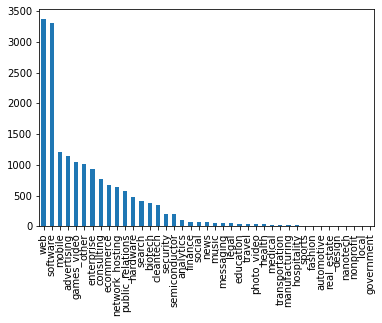

In [21]:
df['category_code'].value_counts().plot.bar();

definir DataFrame acotado a los sectores de interes:

In [22]:
categories = ['software','finance','ecommerce','biotech','cleantech','analytics','real_state']

In [23]:
df_interest = df[df['category_code']=='analytics']

In [24]:
df_interest

,name,category_code,number_of_employees,founded_year,description_x,total_money_raised,offices,description_y,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
509,ContextWeb,analytics,NaN,2000.0,Online advertising exchange market,$63.5M,"[{'description': None, 'address1': '22 Cortlan...",None,22 Cortlandt Street,,10007,New York,NY,USA,40.710140,-74.010808
660,Ooyala,analytics,300.0,2007.0,"Video streaming, analytics, monetization",$122M,"[{'description': 'Corporate Headquarters', 'ad...",Corporate Headquarters,800 West El Camino Real,Suite 350,94040,Mountain View,CA,USA,37.386665,-122.084171
661,Ooyala,analytics,300.0,2007.0,"Video streaming, analytics, monetization",$122M,"[{'description': 'Corporate Headquarters', 'ad...",New York,156 5th Avenue,,10011,New York,NY,USA,NaN,NaN
662,Ooyala,analytics,300.0,2007.0,"Video streaming, analytics, monetization",$122M,"[{'description': 'Corporate Headquarters', 'ad...",London,85 Tottenham Court Road,,W1T 4TQ,London,None,GBR,NaN,NaN
663,Ooyala,analytics,300.0,2007.0,"Video streaming, analytics, monetization",$122M,"[{'description': 'Corporate Headquarters', 'ad...",Guadalajara,"Avenida Americas 1600, Piso 7. Colonia Country...",,44610,Guadalajara,None,MEX,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15944,CorrectNet,analytics,34.0,1997.0,Perfect Reporting. Managed.,$3.37M,"[{'description': 'Headquarters', 'address1': '...",Headquarters,200 Motor Parkway,,11788,Hauppauge,NY,USA,40.808322,-73.254767
16107,OpinionLab,analytics,80.0,1999.0,Voice of Customer Feedback,$15M,"[{'description': 'HQ', 'address1': '600 Centra...",HQ,600 Central Avenue,Suite 265,60035,Highland Park,IL,USA,NaN,NaN
16838,Timetric,analytics,500.0,2008.0,Global market intelligence,$0,"[{'description': 'White Bear Yard', 'address1'...",White Bear Yard,144a Clerkenwell Road,,EC1R 5DF,London,None,GBR,NaN,NaN
17131,OpTier,analytics,150.0,2005.0,Application Management Software,$77.5M,"[{'description': 'Corporate Headquarters', 'ad...",Corporate Headquarters,350 Fifth Avenue,Suite 6540,10118,New York,NY,USA,40.754937,-73.985647


# Gráficas

### Plot 1

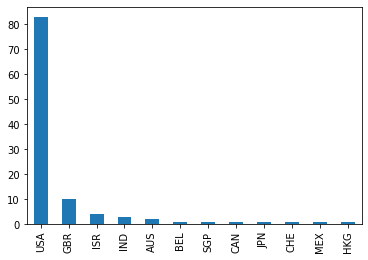

In [25]:
df_interest['country_code'].value_counts().plot.bar();

### Plot 2

In [26]:
df_coordinates = df_interest[['latitude','longitude','name']] # cambiarle a company después

In [27]:
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 509 to 17749
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   74 non-null     float64
 1   longitude  74 non-null     float64
 2   name       109 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


eliminar aquellos que no tienen valores nulos

In [28]:
df_coord_clean = df_coordinates.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [29]:
df_coord_clean

,latitude,longitude,name
509,40.710140,-74.010808,ContextWeb
660,37.386665,-122.084171,Ooyala
1219,31.046051,34.851612,ClickTale
1220,32.068424,34.824785,ClickTale
1440,37.766909,-122.406676,Proximic
...,...,...,...
15857,37.553743,-122.300246,Lattice Engines
15885,37.775196,-122.419204,Topsy Labs
15944,40.808322,-73.254767,CorrectNet
17131,40.754937,-73.985647,OpTier


In [30]:
lat = list(df_coord_clean['latitude'])
lng = list(df_coord_clean['longitude'])


In [31]:
mapa = folium.Map(tiles='Stamen Terrain')

In [38]:
for i in range(len(lat)):
    folium.Marker([lat[i], lng[i]], icon=folium.Icon(color='red'),popup = '<b>Analytics!!</b>', tooltip = 'empresa').add_to(mapa)
    
mapa

### Plot 3

In [33]:
map2 = folium.Map(location=[38, -97], zoom_start=4) # centro geográfico

In [34]:
for i in range(len(lat)):
    folium.Marker([lat[i], lng[i]], icon=folium.Icon(color='red'),popup = '<b>Estos son popups!!</b>', tooltip = 'tooltip').add_to(map2)
    
map2

### Plot 4

In [35]:
df_estado =  df_interest[['name','city','state_code','country_code']]
df_usa = df_estado.loc[df_estado['country_code'] == 'USA'] 

<AxesSubplot:ylabel='state_code'>

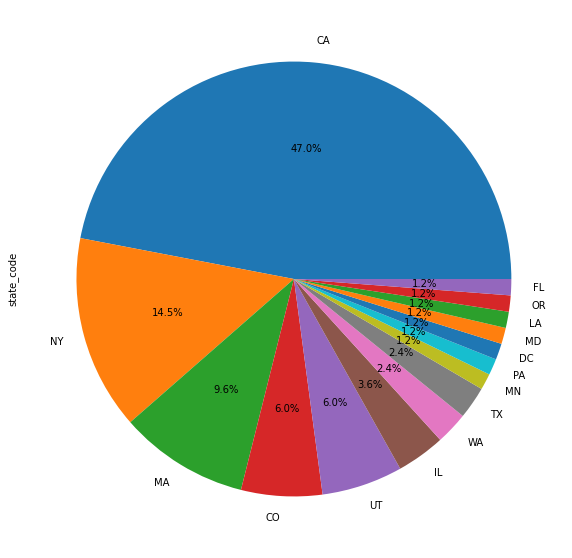

In [36]:
df_usa['state_code'].value_counts().plot.pie(y='number', figsize=(20,10),autopct='%1.1f%%')
#plt.title('Las 15 ciudades con más empresas millenials y menos de 200 empleados');

### Plot 5

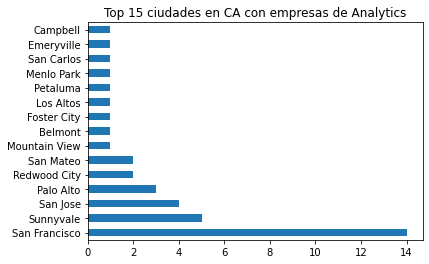

In [40]:
df_usa[df_usa['state_code']=='CA']['city'].value_counts()[:15].plot(kind='barh')
plt.title('Top 15 ciudades en CA con empresas de Analytics');

# Notas adicionales:

Existe un 'exodo' de empresas, inversionistas y founders de San Francisco a Austin,TX y Miami,FL por estímulos fiscales.

https://techcrunch.com/2021/02/03/miami-wont-be-the-next-silicon-valley-because-we-dont-need-another-one/